In [1]:
import pandas as pd 
import numpy as np


In [2]:
df=pd.read_csv("spam_ham_dataset.csv")


In [3]:
df.sample(5)

,Unnamed: 0,label,text,label_num
1758,3448,ham,Subject: month end close schedule * revised *\...,0
4144,3446,ham,Subject: rates\r\ndaren -\r\nrates for septemb...,0
2108,1710,ham,Subject: re : big cowboy for august\r\nmary :\...,0
4885,4029,spam,Subject: \r\nthe president / ceo .\r\ndear sir...,1
943,882,ham,"Subject: re : 98 - 1601\r\njanet ,\r\n. 16 dec...",0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [28]:
df.duplicated().sum()
df.drop(columns=["label_num"],inplace=True)

In [ ]:
## EDA

In [29]:
df.head()

,Unnamed: 0,label,text,Characters,Words,Sentence
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [8]:
df["label"].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [11]:
import matplotlib.pyplot as plt


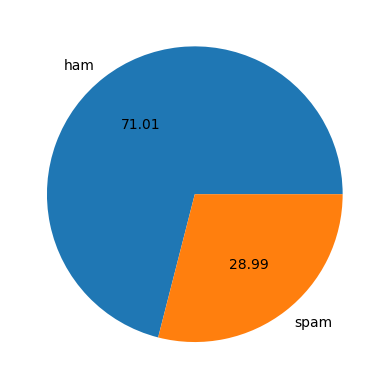

In [13]:
plt.pie(df["label"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [14]:
import nltk

In [15]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Ch
[nltk_data]     Abdullah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
df["Characters"]=df["text"].apply(len)

In [30]:
df.head()

,Unnamed: 0,label,text,Characters,Words,Sentence
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [21]:
df["Words"]=df["text"].apply(lambda x:len((nltk.word_tokenize(x))))

In [31]:
df.head()

,Unnamed: 0,label,text,Characters,Words,Sentence
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [24]:
df["Sentence"]=df["text"].apply(lambda x:len((nltk.sent_tokenize(x))))

In [32]:
df.head()


,Unnamed: 0,label,text,Characters,Words,Sentence
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [33]:
df[["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [36]:
df[df["label"]=="ham"][["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [38]:
df[df["label"]=="spam"][["Characters","Words","Sentence"]].describe()

,Characters,Words,Sentence
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [40]:
import seaborn as sns

<Axes: xlabel='Characters', ylabel='Count'>

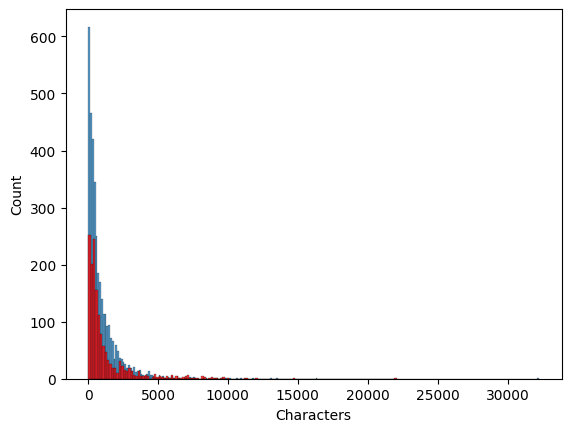

In [ ]:

sns.histplot(df[df["label"]=="ham"]["Characters"])
